# Importing modules and settings

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
from matplotlib.pyplot import rc_context

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

General settings of Scanpy

In [5]:
sc.settings.verbosity = 3 
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')


scanpy==1.9.3 anndata==0.8.0 umap==0.5.2 numpy==1.23.5 scipy==1.9.3 pandas==1.4.3 scikit-learn==1.2.2 statsmodels==0.13.5 python-igraph==0.9.8 louvain==0.7.1 pynndescent==0.5.5


In [6]:
umap_cmap = sns.blend_palette(['xkcd:light grey', 'xkcd:azure'], as_cmap = True)

# Declaring the input and output files

In [7]:
adata = sc.read_h5ad('./h5ad_files/smed_size_analysis_202306.h5ad')

In [8]:
adata

AnnData object with n_obs × n_vars = 28738 × 24000
    obs: 'Size', 'Library', 'Sample', 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4'
    var: 'gene_ids', 'feature_types', 'longest_isoform', 'gene_type', 'gene_JakkeGuo', 'gene_Jakke_ver1', 'gene_ddv6', 'jakkeguo_collapsed', 'jakke_ver1_collapsed', 'ddv6_collapsed', 'Preferred_name', 'Description', 'PFAMs', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'dendrogram_leiden_1', 'dendrogram_leiden_2', 'dendrogram_leiden_3', 'dendrogram_leiden_4', 'hvg', 'leiden', 'leiden_1_colors', 'leiden_2_colors', 'leiden_3_colors', 'leiden_4_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups_logreg_leiden_1', 'rank_genes_groups_logreg_leiden_2', 'rank_genes_groups_logreg_leiden_3', 'rank_genes_groups_logreg_leiden_4', 'rank_genes_

In [9]:
leiden_names = adata.obs.columns[adata.obs.columns.str.contains('leiden')].to_list()

In [10]:
leiden_names

['leiden_1', 'leiden_2', 'leiden_3', 'leiden_4']

In [11]:
adata.var

gene_ids    feature_types  longest_isoform gene_type  \
h1SMcG0000001  h1SMcG0000001  Gene Expression  h1SMcT0000001.1     other   
h1SMcG0000009  h1SMcG0000009  Gene Expression  h1SMcT0000009.2     hconf   
h1SMcG0000010  h1SMcG0000010  Gene Expression  h1SMcT0000010.1     other   
h1SMcG0000011  h1SMcG0000011  Gene Expression  h1SMcT0000011.1     hconf   
h1SMcG0000012  h1SMcG0000012  Gene Expression  h1SMcT0000012.1     hconf   
...                      ...              ...              ...       ...   
h1SMnG0035270  h1SMnG0035270  Gene Expression  h1SMnT0035270.1     hconf   
h1SMnG0035333  h1SMnG0035333  Gene Expression  h1SMnT0035333.1     other   
h1SMnG0035418  h1SMnG0035418  Gene Expression  h1SMnT0035418.1     other   
h1SMnG0035546  h1SMnG0035546  Gene Expression  h1SMnT0035546.1     other   
h1SMnG0035561  h1SMnG0035561  Gene Expression  h1SMnT0035561.1     other   

                  gene_JakkeGuo gene_Jakke_ver1             gene_ddv6  \
h1SMcG0000001                 -               -  dd_Smed_v6_17026_0_4   
h1SMcG0000009  SMEST029652002.1      MSTRG.9914   dd_Smed_v6_5323_0_1   
h1SMcG0000010                 -               -                     -   
h1SMcG0000011  SMEST029655001.1      MSTRG.9916   dd_Smed_v6_6416_0_1   
h1SMcG0000012    SmMSTRG.9913.2      MSTRG.9913  dd_Smed_v6_20296_0_1   
...                         ...             ...                   ...   
h1SMnG0035270                 -               -                     -   
h1SMnG0035333                 -               -                     -   
h1SMnG0035418                 -               -                     -   
h1SMnG0035546                 -               -                     -   
h1SMnG0035561                 -               -                     -   

                                              jakkeguo_collapsed  \
h1SMcG0000001                                   SMEST050392001.1   
h1SMcG0000009  SMEST029652002.1,SmMSTRG.9914.2,SmMSTRG.9914.3...   
h1SMcG0000010                                                  -   
h1SMcG0000011  SMEST029655001.1,SMEST029655002.1,SmMSTRG.9916...   
h1SMcG0000012                    SMEST029666001.1,SmMSTRG.9913.2   
...                                                          ...   
h1SMnG0035270                                                  -   
h1SMnG0035333                                                  -   
h1SMnG0035418                                                  -   
h1SMnG0035546                                                  -   
h1SMnG0035561                                                  -   

              jakke_ver1_collapsed                             ddv6_collapsed  \
h1SMcG0000001     SMESG000050392.1  dd_Smed_v6_17026_0_4,dd_Smed_v6_17026_0_5   
h1SMcG0000009           MSTRG.9914                        dd_Smed_v6_5323_0_1   
h1SMcG0000010                    -                                          -   
h1SMcG0000011           MSTRG.9916                        dd_Smed_v6_6416_0_1   
h1SMcG0000012           MSTRG.9913                       dd_Smed_v6_20296_0_1   
...                            ...                                        ...   
h1SMnG0035270                    -                                          -   
h1SMnG0035333                    -                                          -   
h1SMnG0035418                    -                                          -   
h1SMnG0035546                    -                                          -   
h1SMnG0035561                    -                                          -   

               ... n_cells_by_counts mean_counts pct_dropout_by_counts  \
h1SMcG0000001  ...                68    0.002499             99.764012   
h1SMcG0000009  ...               173    0.006108             99.399618   
h1SMcG0000010  ...                 9    0.000312             99.968766   
h1SMcG0000011  ...              1705    0.063092             94.082943   
h1SMcG0000012  ...                22    0.000798             99.923651

In [12]:
adata.obs.columns


Index(['Size', 'Library', 'Sample', 'n_counts', 'n_genes', 'n_genes_by_counts',
       'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_1',
       'leiden_2', 'leiden_3', 'leiden_4'],
      dtype='object')

# Selecting one clustering layer from leiden_names

In [13]:
clusteringlayer = 'leiden_3'

# Pandas dataframe with markers and excel file

In [14]:
list(adata.uns)

['dendrogram_leiden_1',
 'dendrogram_leiden_2',
 'dendrogram_leiden_3',
 'dendrogram_leiden_4',
 'hvg',
 'leiden',
 'leiden_1_colors',
 'leiden_2_colors',
 'leiden_3_colors',
 'leiden_4_colors',
 'log1p',
 'neighbors',
 'pca',
 'rank_genes_groups_logreg_leiden_1',
 'rank_genes_groups_logreg_leiden_2',
 'rank_genes_groups_logreg_leiden_3',
 'rank_genes_groups_logreg_leiden_4',
 'rank_genes_groups_wilcox_leiden_1',
 'rank_genes_groups_wilcox_leiden_2',
 'rank_genes_groups_wilcox_leiden_3',
 'rank_genes_groups_wilcox_leiden_4',
 'umap']

In [15]:
markers_w = pd.DataFrame(adata.uns['rank_genes_groups_wilcox_'+clusteringlayer]['names']).head(50)

In [16]:
markers_w

0              1              2              3              4  \
0   h1SMcG0019136  h1SMcG0008035  h1SMcG0014354  h1SMcG0000998  h1SMnG0035616   
1   h1SMcG0020223  h1SMnG0035616  h1SMcG0022555  h1SMcG0014354  h1SMcG0008035   
2   h1SMcG0015883  h1SMnG0035608  h1SMcG0015236  h1SMcG0009472  h1SMcG0010823   
3   h1SMcG0005152  h1SMcG0019482  h1SMcG0016741  h1SMcG0022555  h1SMcG0007496   
4   h1SMcG0009596  h1SMcG0013999  h1SMcG0001082  h1SMcG0006857  h1SMnG0035608   
5   h1SMcG0019758  h1SMcG0010823  h1SMcG0018373  h1SMcG0007433  h1SMcG0010835   
6   h1SMcG0020195  h1SMcG0007496  h1SMcG0000998  h1SMcG0001082  h1SMcG0013999   
7   h1SMcG0003247  h1SMcG0010835  h1SMcG0018100  h1SMcG0016741  h1SMcG0019482   
8   h1SMcG0000076  h1SMcG0002117  h1SMcG0014134  h1SMcG0018100  h1SMcG0002117   
9   h1SMcG0009890  h1SMnG0035175  h1SMcG0006857  h1SMcG0018373  h1SMcG0015722   
10  h1SMnG0006366  h1SMcG0015722  h1SMcG0006787  h1SMcG0014134  h1SMcG0013540   
11  h1SMcG0013355  h1SMcG0005241  h1SMcG0007433  h1SMcG0006787  h1SMcG0022103   
12  h1SMcG0021052  h1SMcG0012505  h1SMcG0009472  h1SMcG0020983  h1SMcG0021424   
13  h1SMcG0018921  h1SMcG0021692  h1SMcG0019141  h1SMcG0019141  h1SMcG0013627   
14  h1SMcG0006436  h1SMcG0003975  h1SMcG0020690  h1SMcG0020690  h1SMcG0006433   
15  h1SMcG0009545  h1SMcG0021514  h1SMcG0002221  h1SMcG0002221  h1SMcG0013162   
16  h1SMcG0002149  h1SMcG0013540  h1SMcG0019140  h1SMcG0019140  h1SMcG0016482   
17  h1SMcG0001288  h1SMnG0035352  h1SMcG0017034  h1SMcG0004606  h1SMcG0003097   
18  h1SMcG0019733  h1SMcG0009165  h1SMcG0020022  h1SMcG0012064  h1SMnG0035618   
19  h1SMcG0004373  h1SMcG0004067  h1SMcG0017092  h1SMnG0014475  h1SMcG0020537   
20  h1SMcG0017955  h1SMcG0023145  h1SMcG0003233  h1SMcG0003233  h1SMcG0023145   
21  h1SMcG0000709  h1SMcG0006984  h1SMnG0014475  h1SMcG0013798  h1SMnG0035607   
22  h1SMcG0004585  h1SMcG0015499  h1SMcG0016673  h1SMcG0022236  h1SMnG0035619   
23  h1SMcG0011689  h1SMcG0022103  h1SMcG0012064  h1SMcG0004607  h1SMcG0009785   
24  h1SMcG0015663  h1SMcG0016303  h1SMcG0004607  h1SMcG0005277  h1SMcG0013746   
25  h1SMcG0011732  h1SMnG0035127  h1SMcG0022236  h1SMnG0024083  h1SMcG0021692   
26  h1SMcG0015241  h1SMnG0014807  h1SMcG0004606  h1SMcG0005893  h1SMcG0006725   
27  h1SMcG0019646  h1SMcG0013162  h1SMcG0003258  h1SMcG0015236  h1SMcG0005241   
28  h1SMcG0017191  h1SMcG0006230  h1SMcG0005893  h1SMcG0002622  h1SMcG0009165   
29  h1SMcG0010294  h1SMnG0035138  h1SMcG0020983  h1SMcG0013445  h1SMcG0023142   
30  h1SMcG0020793  h1SMnG0021160  h1SMcG0002622  h1SMcG0001827  h1SMcG0004525   
31  h1SMcG0004414  h1SMcG0018011  h1SMcG0013462  h1SMcG0003258  h1SMcG0014692   
32  h1SMcG0017844  h1SMcG0012486  h1SMcG0010597  h1SMcG0017536  h1SMcG0023144   
33  h1SMcG0011923  h1SMnG0026699  h1SMcG0017536  h1SMcG0020682  h1SMcG0006230   
34  h1SMcG0003722  h1SMnG0035607  h1SMcG0005277  h1SMcG0020942  h1SMnG0035175   
35  h1SMcG0018063  h1SMnG0035131  h1SMcG0013798  h1SMnG0020735  h1SMcG0000643   
36  h1SMcG0000515  h1SMcG0001184  h1SMcG0013445  h1SMcG0017034  h1SMcG0016303   
37  h1SMcG0016624  h1SMnG0035618  h1SMnG0024083  h1SMcG0013462  h1SMcG0020811   
38  h1SMcG0001238  h1SMnG0035619  h1SMcG0020942  h1SMcG0021076  h1SMcG0023143   
39  h1SMcG0010644  h1SMcG0021885  h1SMcG0011793  h1SMcG0017092  h1SMcG0012505   
40  h1SMcG0016775  h1SMnG0033052  h1SMcG0003207  h1SMcG0015903  h1SMnG0035352   
41  h1SMcG0013018  h1SMcG0023142  h1SMcG0015433  h1SMcG0004827  h1SMcG0009590   
42  h1SMcG0014143  h1SMcG0021424  h1SMcG0021452  h1SMcG0011201  h1SMcG0014963   
43  h1SMcG0014350  h1SMcG0003097  h1SMcG0021771  h1SMcG0002720  h1SMcG0018011   
44  h1SMcG0016344  h1SMcG0013205  h1SMnG0033069  h1SMcG0007395  h1SMcG0021514   
45  h1SMcG0005710  h1SMnG0026677  h1SMcG0019853  h1SMcG0014406  h1SMcG0001189   
46  h1SMcG0017291  h1SMcG0006433  h1SMcG0019646  h1SMcG0016999  h1SMnG0035131   
47  h1SMcG0012853  h1SMcG0014963  h1SMnG0020735  h1SMnG0021707  h1SMcG0011210   
48  h1SMcG0006940  h1SMcG0023143  h1SMcG0007395

In [17]:
markers_w_l = pd.DataFrame(adata.uns['rank_genes_groups_wilcox_'+clusteringlayer]['pvals_adj']).head(50)

In [18]:
markers_l = pd.DataFrame(adata.uns['rank_genes_groups_logreg_'+clusteringlayer]['names']).head(50)

In [19]:
markers_l

0              1              2              3              4  \
0   h1SMcG0015883  h1SMcG0008035  h1SMcG0020022  h1SMcG0000998  h1SMcG0008035   
1   h1SMcG0020223  h1SMcG0005241  h1SMcG0016673  h1SMcG0006857  h1SMcG0020537   
2   h1SMcG0015241  h1SMcG0004237  h1SMcG0015236  h1SMcG0014354  h1SMnG0035616   
3   h1SMcG0019136  h1SMnG0020097  h1SMcG0000998  h1SMcG0014406  h1SMcG0009785   
4   h1SMcG0004827  h1SMnG0012397  h1SMcG0017034  h1SMcG0008106  h1SMcG0001488   
5   h1SMcG0009545  h1SMnG0021196  h1SMcG0014354  h1SMcG0009472  h1SMcG0013999   
6   h1SMcG0016202  h1SMcG0009165  h1SMcG0003207  h1SMcG0001827  h1SMcG0004525   
7   h1SMcG0004823  h1SMcG0004050  h1SMcG0010878  h1SMcG0017363  h1SMcG0013627   
8   h1SMcG0016775  h1SMcG0013999  h1SMcG0022555  h1SMcG0019319  h1SMcG0013162   
9   h1SMcG0017243  h1SMcG0007442  h1SMcG0017092  h1SMcG0009250  h1SMcG0009590   
10  h1SMcG0019733  h1SMnG0023804  h1SMcG0009854  h1SMcG0010376  h1SMcG0006483   
11  h1SMcG0001288  h1SMnG0032688  h1SMcG0017805  h1SMcG0020983  h1SMcG0001973   
12  h1SMcG0007970  h1SMnG0014820  h1SMcG0018373  h1SMcG0015050  h1SMcG0005241   
13  h1SMcG0003722  h1SMcG0006467  h1SMcG0009859  h1SMcG0015903  h1SMcG0000643   
14  h1SMcG0022380  h1SMnG0014540  h1SMcG0006734  h1SMcG0016319  h1SMcG0006433   
15  h1SMcG0010495  h1SMcG0017584  h1SMcG0016741  h1SMcG0010732  h1SMcG0003097   
16  h1SMcG0005390  h1SMcG0002198  h1SMcG0006787  h1SMcG0005277  h1SMcG0011798   
17  h1SMcG0001467  h1SMnG0034404  h1SMcG0004725  h1SMcG0005893  h1SMcG0001654   
18  h1SMcG0006436  h1SMcG0001443  h1SMcG0016202  h1SMcG0018100  h1SMcG0008539   
19  h1SMcG0015663  h1SMcG0009446  h1SMcG0010597  h1SMcG0007433  h1SMcG0015561   
20  h1SMcG0006125  h1SMcG0009616  h1SMcG0019141  h1SMcG0016999  h1SMcG0023144   
21  h1SMcG0016338  h1SMnG0014183  h1SMcG0002309  h1SMcG0015505  h1SMcG0013809   
22  h1SMcG0013355  h1SMnG0000556  h1SMcG0017506  h1SMnG0024083  h1SMcG0018285   
23  h1SMcG0006999  h1SMcG0018531  h1SMcG0000708  h1SMcG0012565  h1SMcG0002316   
24  h1SMcG0022206  h1SMcG0019373  h1SMcG0015598  h1SMcG0013644  h1SMcG0016320   
25  h1SMcG0004767  h1SMcG0007624  h1SMcG0012580  h1SMcG0001082  h1SMcG0002175   
26  h1SMcG0007378  h1SMcG0004811  h1SMcG0006857  h1SMnG0020735  h1SMcG0018997   
27  h1SMcG0001306  h1SMcG0018680  h1SMcG0006295  h1SMcG0016741  h1SMcG0006725   
28  h1SMcG0019029  h1SMcG0007643  h1SMcG0005423  h1SMcG0020682  h1SMcG0006469   
29  h1SMcG0017081  h1SMnG0024276  h1SMcG0001082  h1SMcG0011207  h1SMcG0020811   
30  h1SMcG0009175  h1SMnG0035616  h1SMcG0017808  h1SMcG0007087  h1SMcG0017549   
31  h1SMcG0001803  h1SMcG0019383  h1SMcG0021709  h1SMcG0003258  h1SMcG0011633   
32  h1SMcG0004284  h1SMnG0006977  h1SMcG0001030  h1SMcG0005939  h1SMcG0003232   
33  h1SMcG0015505  h1SMcG0008525  h1SMcG0014481  h1SMcG0006787  h1SMcG0000255   
34  h1SMcG0000494  h1SMcG0013780  h1SMcG0001797  h1SMcG0004606  h1SMcG0010730   
35  h1SMcG0013514  h1SMnG0034725  h1SMcG0018100  h1SMcG0011283  h1SMnG0035608   
36  h1SMcG0006404  h1SMcG0001551  h1SMcG0007433  h1SMcG0014134  h1SMcG0017075   
37  h1SMcG0018921  h1SMnG0009542  h1SMcG0000017  h1SMcG0003233  h1SMcG0001140   
38  h1SMcG0005533  h1SMnG0018227  h1SMcG0000872  h1SMcG0020325  h1SMcG0021424   
39  h1SMcG0002561  h1SMnG0024805  h1SMcG0001433  h1SMcG0002221  h1SMnG0002276   
40  h1SMcG0018919  h1SMnG0014224  h1SMcG0022548  h1SMcG0019141  h1SMcG0001898   
41  h1SMcG0000872  h1SMnG0021290  h1SMcG0007937  h1SMcG0018373  h1SMcG0001574   
42  h1SMcG0004414  h1SMcG0006277  h1SMcG0002517  h1SMcG0011201  h1SMnG0034420   
43  h1SMcG0014402  h1SMcG0008694  h1SMcG0015433  h1SMcG0017666  h1SMcG0009165   
44  h1SMcG0003714  h1SMcG0010492  h1SMcG0002221  h1SMcG0007116  h1SMcG0005767   
45  h1SMcG0003411  h1SMcG0005400  h1SMcG0005277  h1SMnG0021707  h1SMnG0033052   
46  h1SMcG0000432  h1SMcG0017814  h1SMcG0022543  h1SMcG0015816  h1SMcG0013376   
47  h1SMcG0011282  h1SMcG0021119  h1SMcG0004401  h1SMcG0013445  h1SMcG0020880   
48  h1SMcG0016529  h1SMcG0006645  h1SMcG0014134

# Plots

C:\Users\p0084975\Anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


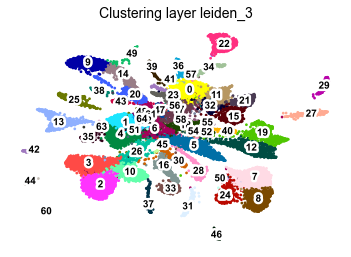

In [20]:
with rc_context({'figure.figsize': (12, 12)}):
    sc.pl.umap(adata, color=clusteringlayer, legend_loc='on data', legend_fontoutline = 5, title= 'Clustering layer '+str(clusteringlayer), size = 30,
        frameon=False)

C:\Users\p0084975\Anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


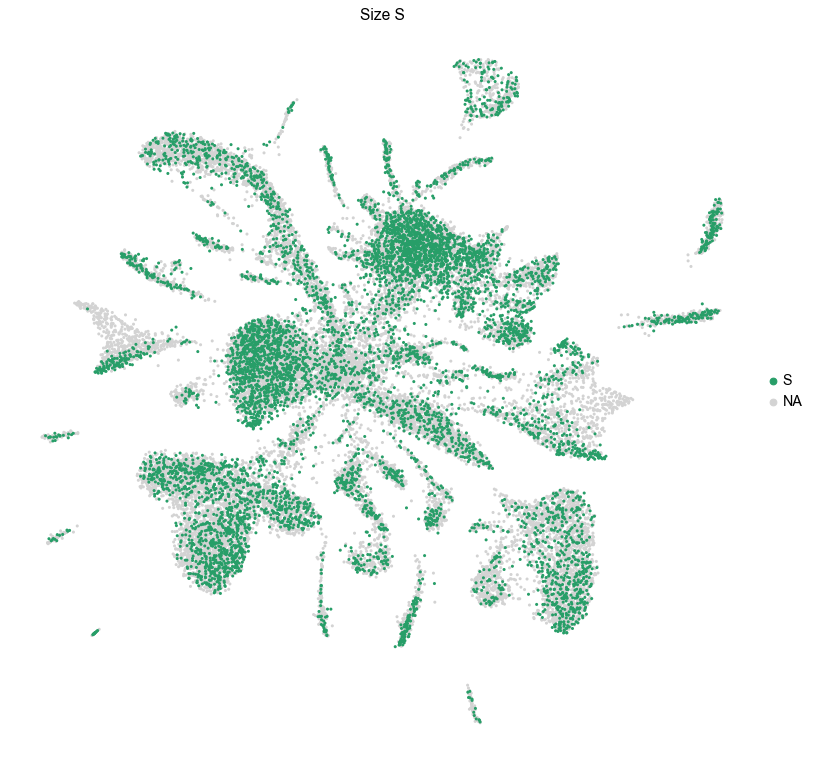

In [21]:
with rc_context({'figure.figsize': (12, 12)}):
    sc.pl.umap(adata, color= 'Size', groups = 'S', legend_fontoutline = 5, title= 'Size S', size = 30,
        frameon=False)

C:\Users\p0084975\Anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


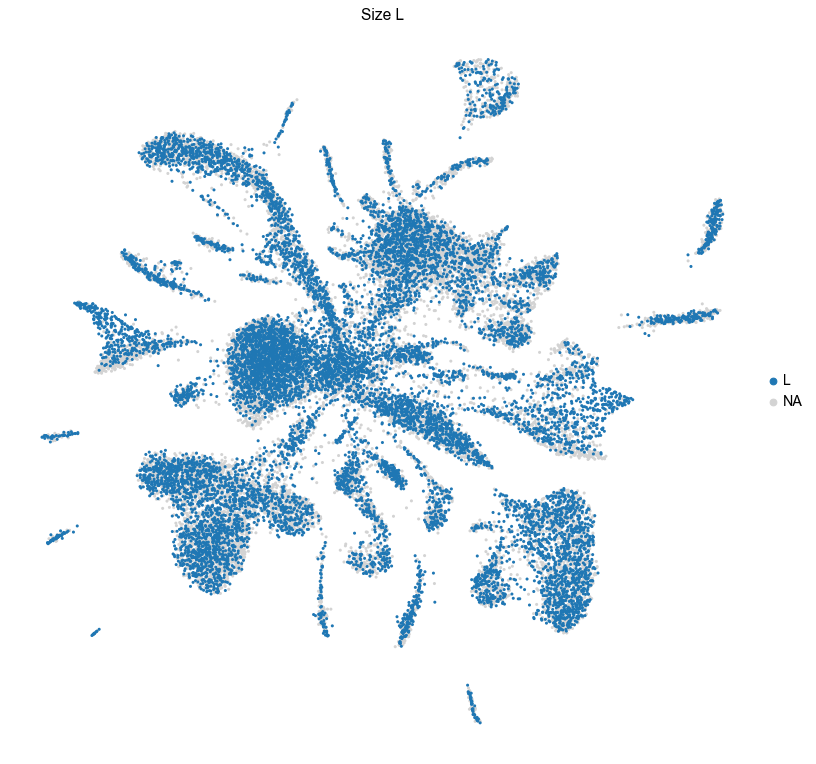

In [22]:
with rc_context({'figure.figsize': (12, 12)}):
    sc.pl.umap(adata, color= 'Size', groups = 'L', legend_fontoutline = 5, title= 'Size L', size = 30,
        frameon=False)

C:\Users\p0084975\Anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


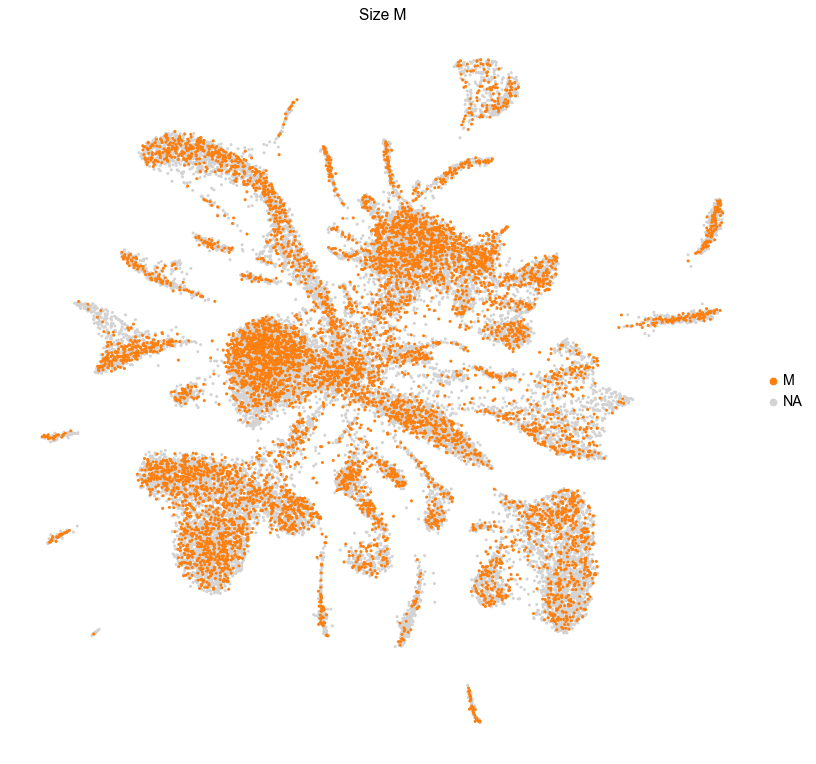

In [23]:
with rc_context({'figure.figsize': (12, 12)}):
    sc.pl.umap(adata, color= 'Size', groups = 'M', legend_fontoutline = 5, title= 'Size M', size = 30,
        frameon=False)

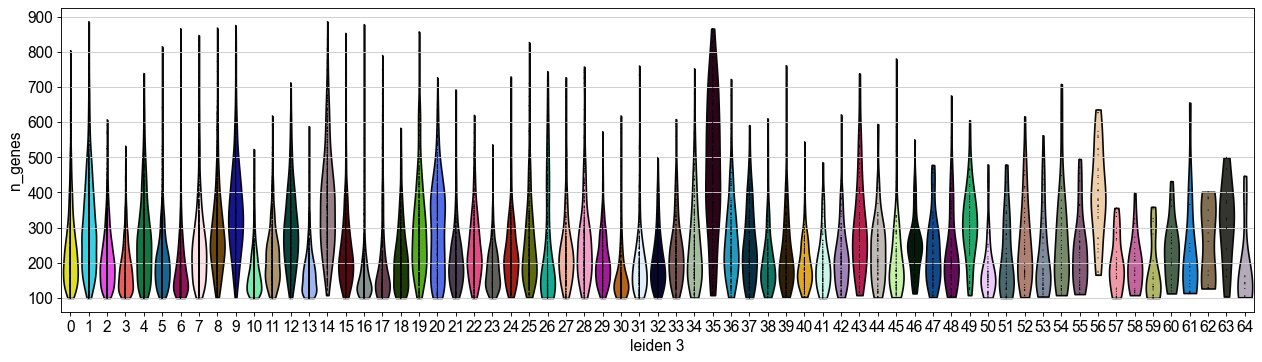

In [24]:
with rc_context({'figure.figsize': (15, 5)}):
    sc.pl.violin(adata, keys = "n_genes" , groupby = clusteringlayer, jitter = False)

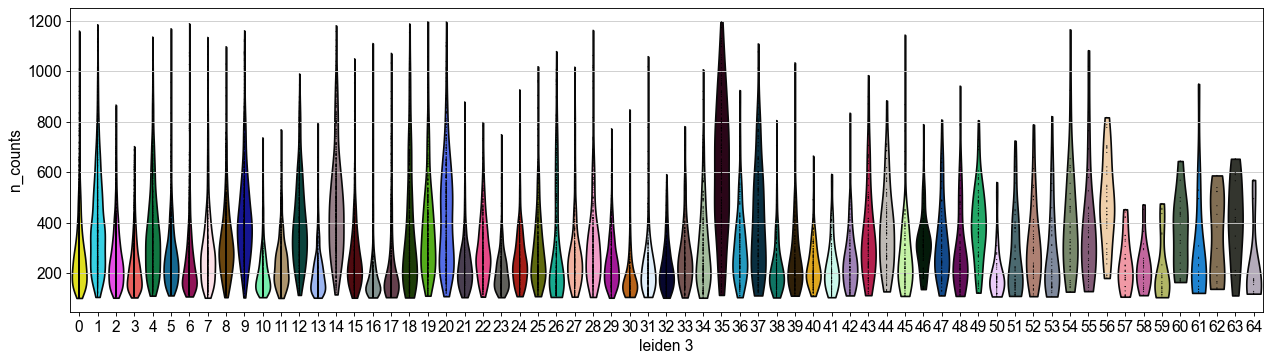

In [25]:
with rc_context({'figure.figsize': (15, 5)}):
    sc.pl.violin(adata, keys = "n_counts" , groupby = clusteringlayer, jitter = False)

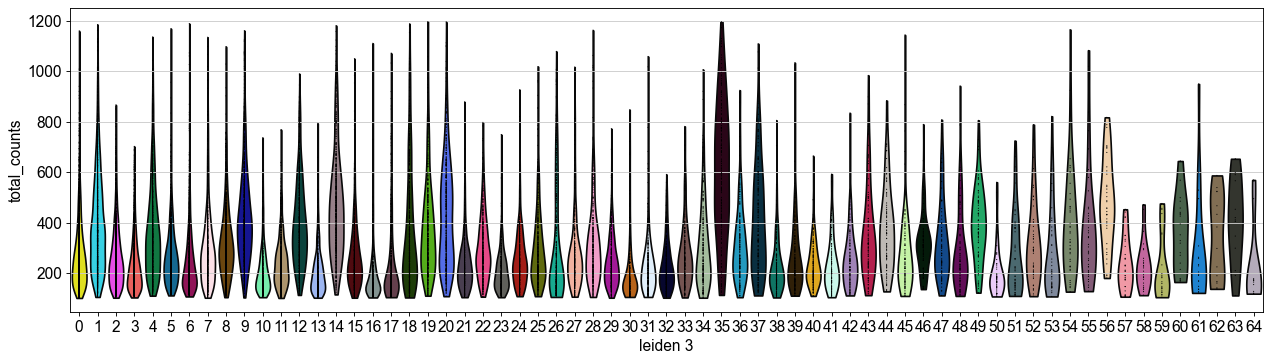

In [26]:
with rc_context({'figure.figsize': (15, 5)}):
    sc.pl.violin(adata, keys = "total_counts" , groupby = clusteringlayer, jitter = False)

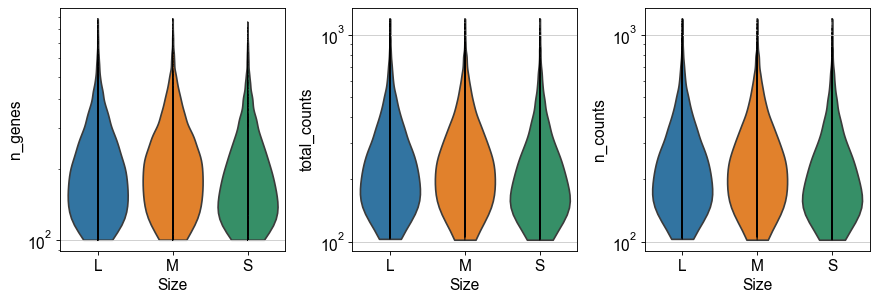

In [27]:
sc.pl.violin(adata, keys = ['n_genes', 'total_counts', 'n_counts'] , groupby = 'Size', log = True, jitter = False, multi_panel = True)

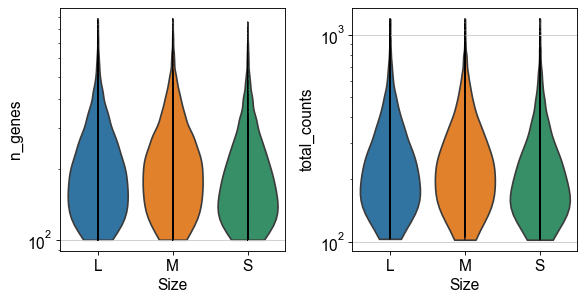

In [28]:
sc.pl.violin(adata, keys = ['n_genes', 'total_counts'] , groupby = 'Size', log = True, jitter = False, multi_panel = True)

In [29]:
adata.obs

Size Library Sample  n_counts  n_genes  \
L23_1_CATCAAGTGAACAGGCGTCTGTCA    L      L1   L_L1     295.0      255   
L23_1_AACGCTTAACACAGAAAAGACGGA    L      L1   L_L1     125.0      117   
L23_1_AGTCACTAGAACAGGCCGGATTGC    M      L1   M_L1     480.0      348   
L23_1_CCGTGAGAGCTAACGACGCATACA    M      L1   M_L1     668.0      510   
L23_1_CGACTGGAATAGCGACTATCAGCA    M      L1   M_L1     267.0      240   
...                             ...     ...    ...       ...      ...   
L23_2_CCGAAGTACCTCTATCAACGCTTA    M      L2   M_L2     706.0      576   
L23_2_CGAACTTAACCTCCAACCGTGAGA    M      L2   M_L2     724.0      508   
L23_2_ACAGCAGATCTTCACAAGATGTAC    L      L2   L_L2     174.0      153   
L23_2_AAACATCGATGCCTAACATACCAA    L      L2   L_L2     336.0      275   
L23_2_CAGCGTTACGACTGGATATCAGCA    S      L2   S_L2     251.0      224   

                                n_genes_by_counts  total_counts  \
L23_1_CATCAAGTGAACAGGCGTCTGTCA                255         295.0   
L23_1_AACGCTTAACACAGAAAAGACGGA                117         125.0   
L23_1_AGTCACTAGAACAGGCCGGATTGC                348         480.0   
L23_1_CCGTGAGAGCTAACGACGCATACA                510         668.0   
L23_1_CGACTGGAATAGCGACTATCAGCA                240         267.0   
...                                           ...           ...   
L23_2_CCGAAGTACCTCTATCAACGCTTA                576         706.0   
L23_2_CGAACTTAACCTCCAACCGTGAGA                508         724.0   
L23_2_ACAGCAGATCTTCACAAGATGTAC                153         174.0   
L23_2_AAACATCGATGCCTAACATACCAA                275         336.0   
L23_2_CAGCGTTACGACTGGATATCAGCA                224         251.0   

                                total_counts_mt  pct_counts_mt leiden_1  \
L23_1_CATCAAGTGAACAGGCGTCTGTCA              0.0            0.0        2   
L23_1_AACGCTTAACACAGAAAAGACGGA              0.0            0.0       10   
L23_1_AGTCACTAGAACAGGCCGGATTGC              0.0            0.0        1   
L23_1_CCGTGAGAGCTAACGACGCATACA              0.0            0.0        3   
L23_1_CGACTGGAATAGCGACTATCAGCA              0.0            0.0        3   
...                                         ...            ...      ...   
L23_2_CCGAAGTACCTCTATCAACGCTTA              0.0            0.0       12   
L23_2_CGAACTTAACCTCCAACCGTGAGA              0.0            0.0        1   
L23_2_ACAGCAGATCTTCACAAGATGTAC              0.0            0.0       21   
L23_2_AAACATCGATGCCTAACATACCAA              0.0            0.0        8   
L23_2_CAGCGTTACGACTGGATATCAGCA              0.0            0.0        0   

                               leiden_2 leiden_3 leiden_4  
L23_1_CATCAAGTGAACAGGCGTCTGTCA        7        8        9  
L23_1_AACGCTTAACACAGAAAAGACGGA       17       16       19  
L23_1_AGTCACTAGAACAGGCCGGATTGC        0        1        0  
L23_1_CCGTGAGAGCTAACGACGCATACA       27       26       26  
L23_1_CGACTGGAATAGCGACTATCAGCA       15       18       65  
...                                 ...      ...      ...  
L23_2_CCGAAGTACCTCTATCAACGCTTA       42       43       47  
L23_2_CGAACTTAACCTCCAACCGTGAGA        0        1        0  
L23_2_ACAGCAGATCTTCACAAGATGTAC       28       30       32  
L23_2_AAACATCGATGCCTAACATACCAA       19       19       43  
L23_2_CAGCGTTACGACTGGATATCAGCA        9       32       33  

[28738 rows x 13 columns]

In [30]:
adata.obs['Sample'].value_counts()

L_L2    6752
L_L1    6394
S_L2    4161
M_L2    3984
M_L1    3806
S_L1    3641
Name: Sample, dtype: int64

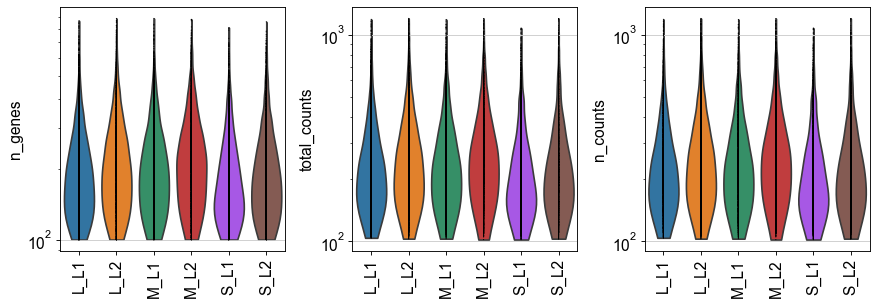

In [31]:
sc.pl.violin(adata, keys = ['n_genes', 'total_counts', 'n_counts'] , groupby = 'Sample', 
             order = ['L_L1', 'L_L2', 'M_L1', 'M_L2','S_L1', 'S_L2'], 
             log = True, jitter = False, multi_panel = True, rotation = 90)

C:\Users\p0084975\Anaconda3\lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


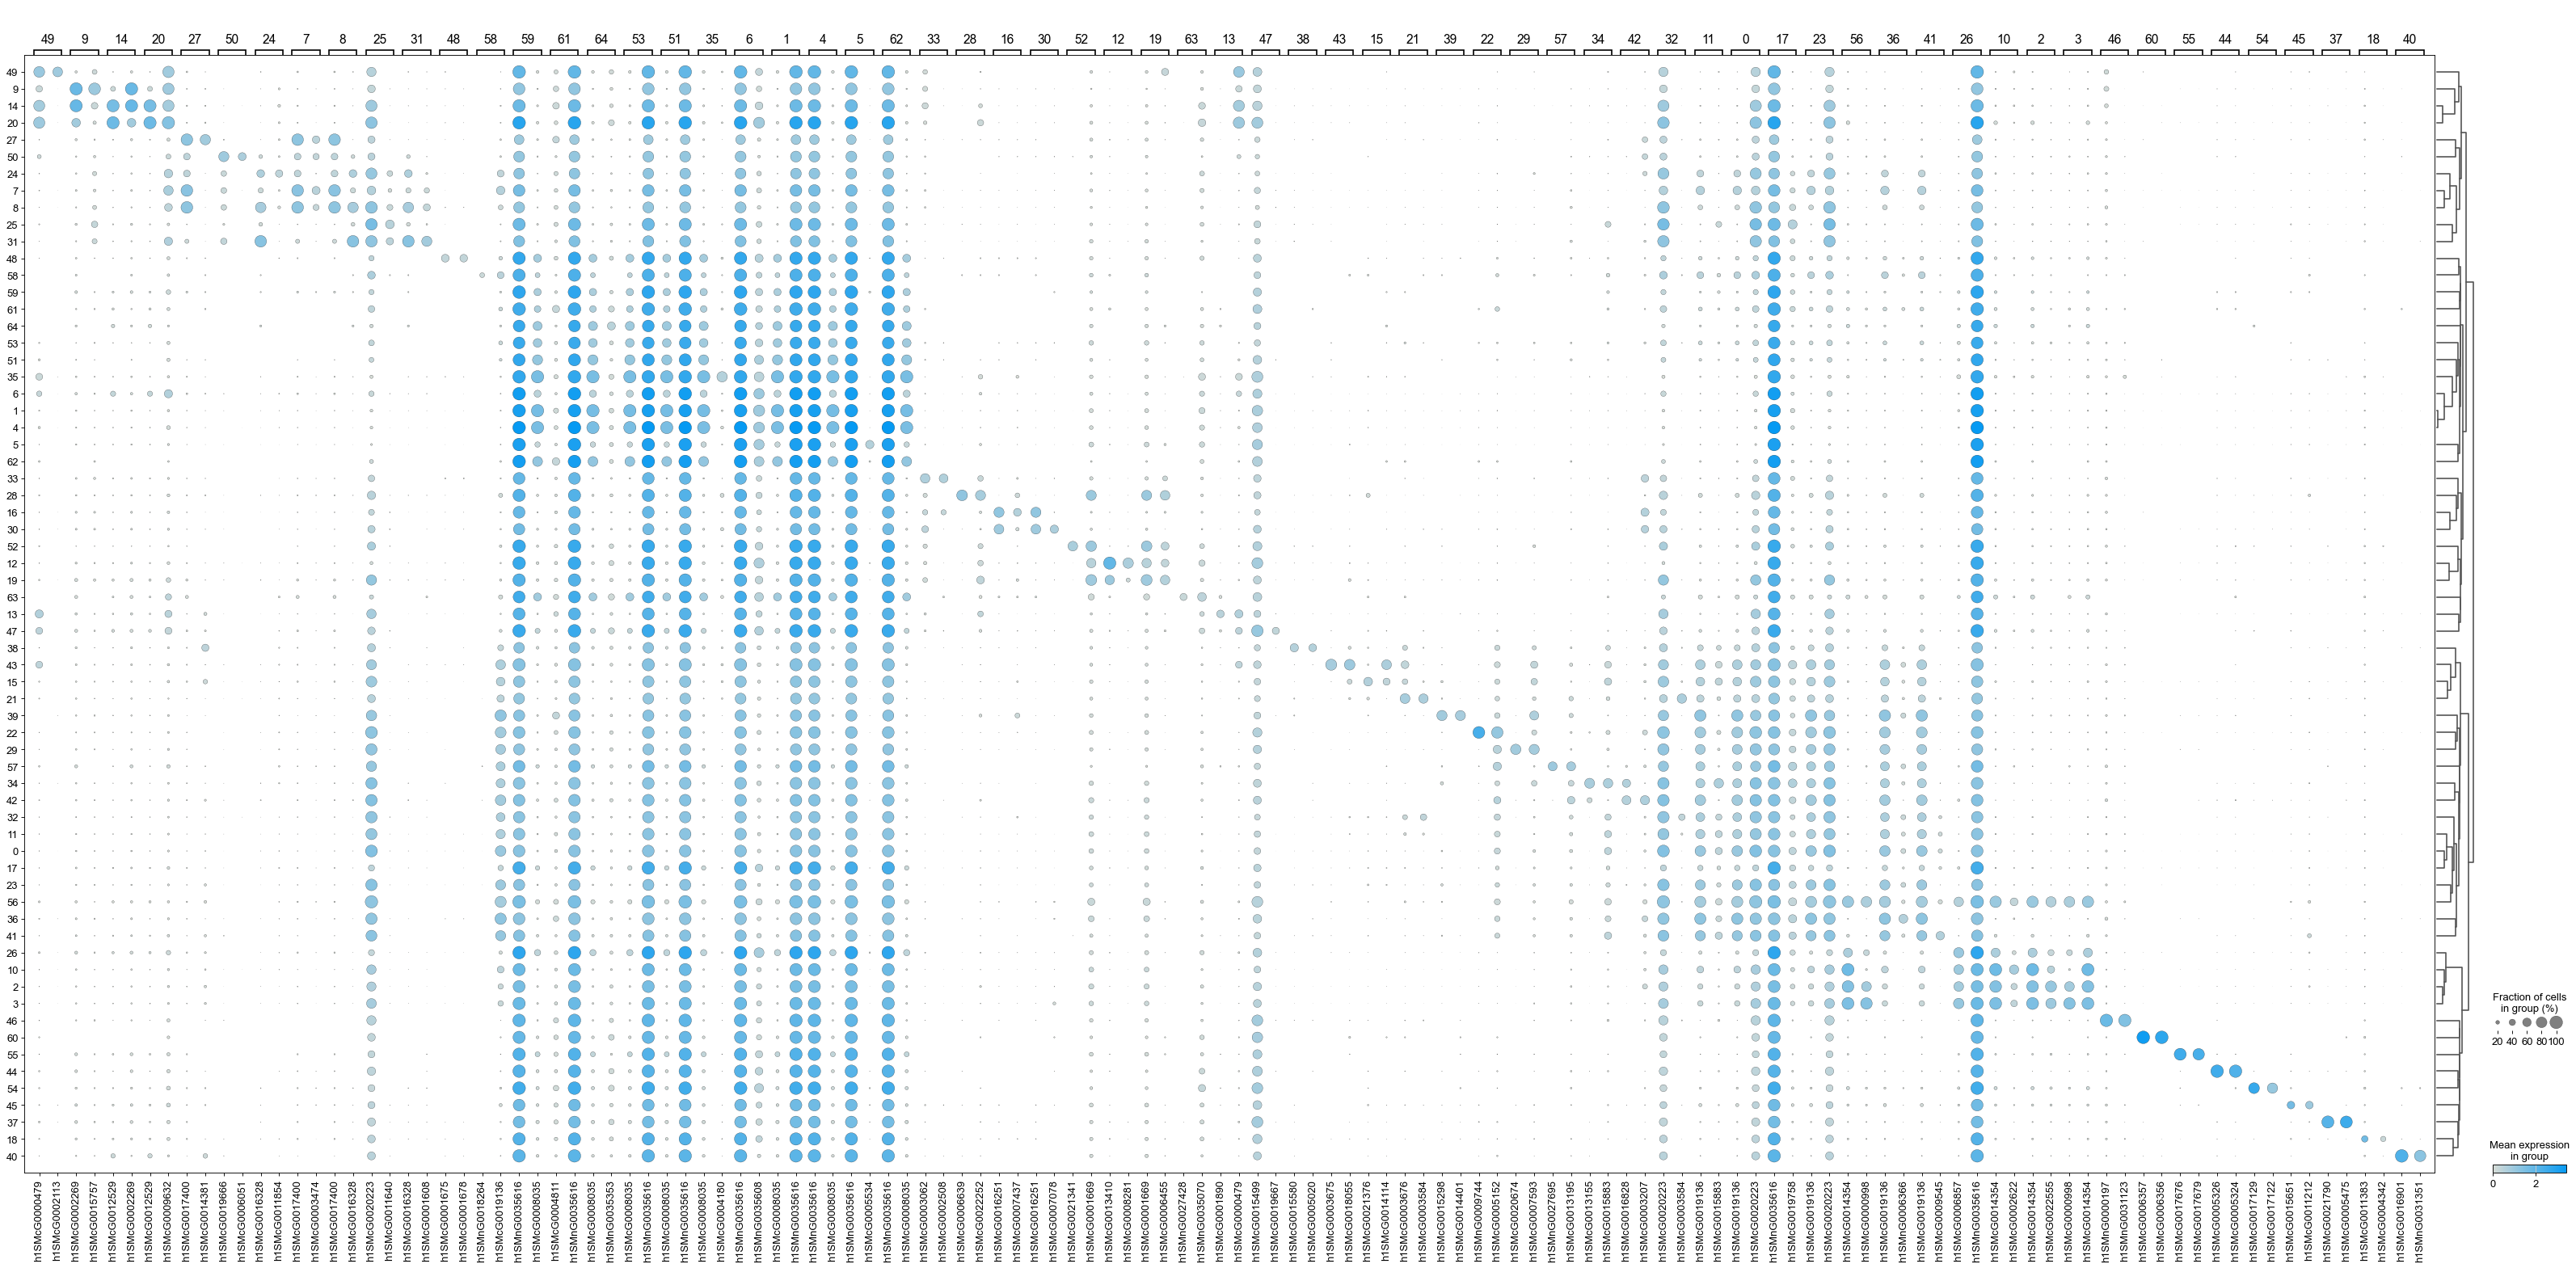

In [32]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=2, key = 'rank_genes_groups_wilcox_'+clusteringlayer, cmap = umap_cmap)

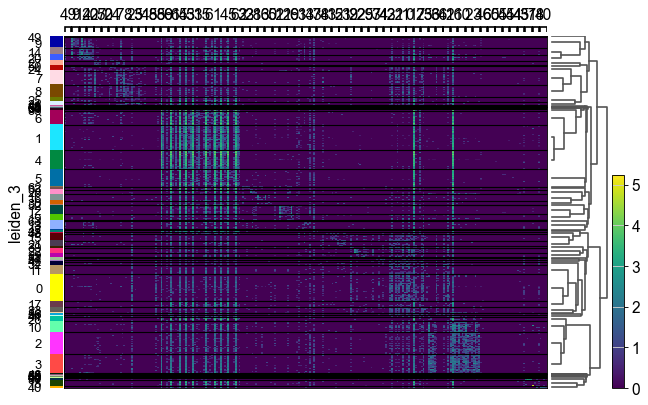

In [33]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=4, key = 'rank_genes_groups_wilcox_'+clusteringlayer)

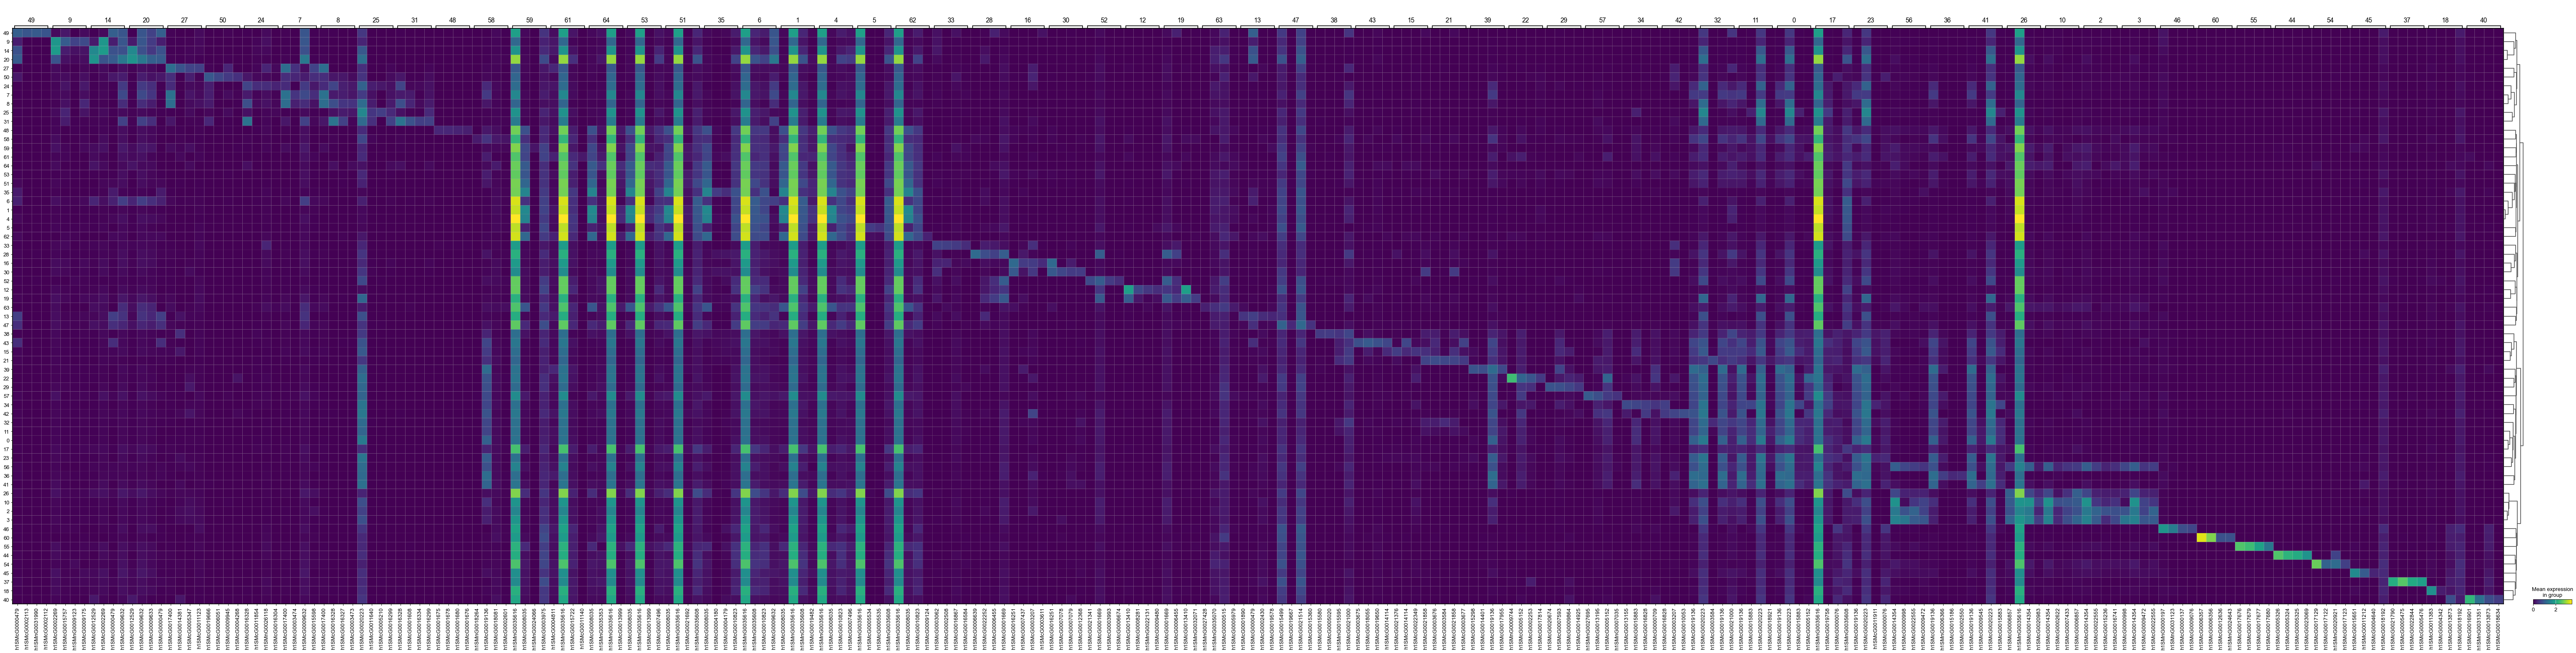

In [34]:
sc.pl.rank_genes_groups_matrixplot(adata, n_genes=4, key = 'rank_genes_groups_wilcox_'+clusteringlayer)

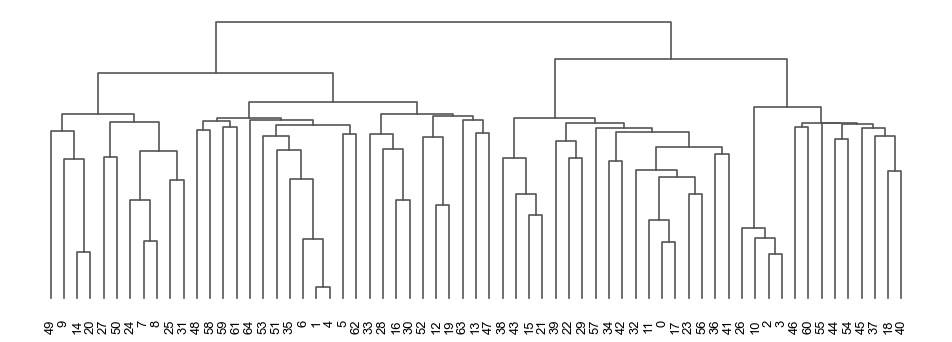

In [35]:
with rc_context({'figure.figsize': (15, 5)}):
    sc.pl.dendrogram(adata, groupby = clusteringlayer)

In [36]:
adata.obs.columns

Index(['Size', 'Library', 'Sample', 'n_counts', 'n_genes', 'n_genes_by_counts',
       'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_1',
       'leiden_2', 'leiden_3', 'leiden_4'],
      dtype='object')

C:\Users\p0084975\Anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
C:\Users\p0084975\Anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(


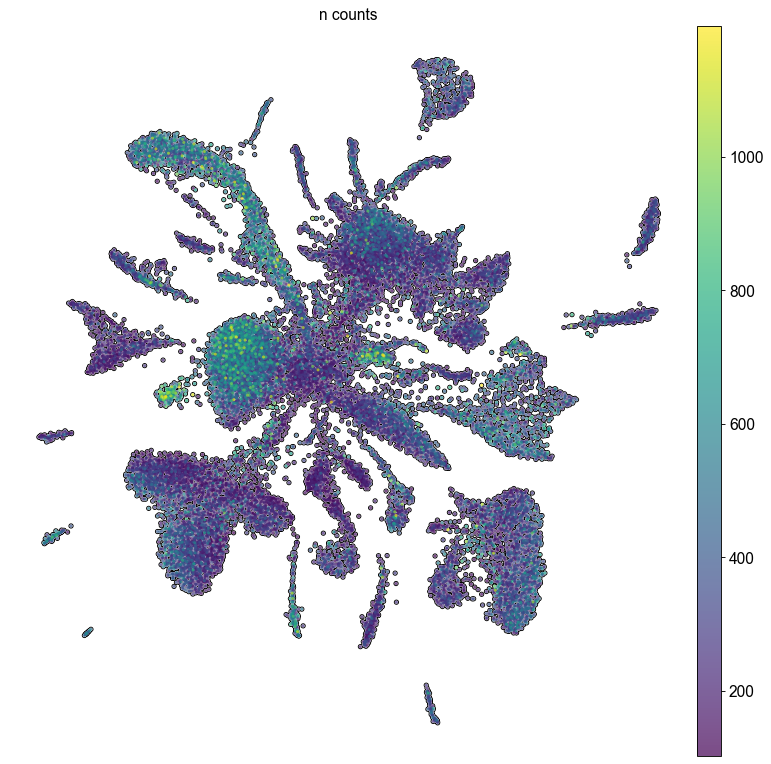

In [37]:
with rc_context({'figure.figsize': (12, 12)}):
    sc.pl.umap(adata, color='n_counts', legend_loc='on data', legend_fontoutline = 5, title= 'n counts', size = 30,
        frameon=False, add_outline = True)

C:\Users\p0084975\Anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
C:\Users\p0084975\Anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(


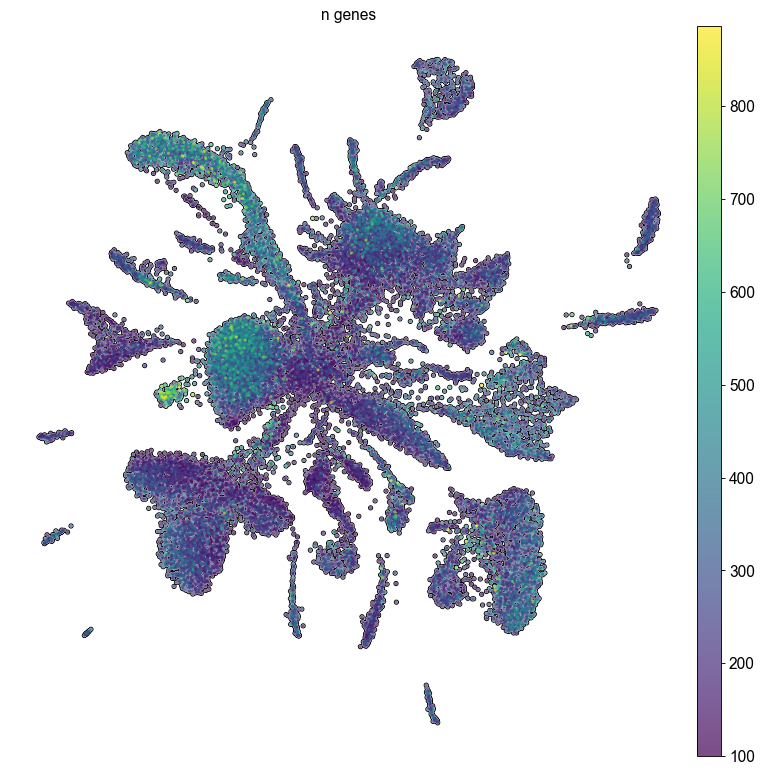

In [38]:
with rc_context({'figure.figsize': (12, 12)}):
    sc.pl.umap(adata, color='n_genes', legend_loc='on data', legend_fontoutline = 5, title= 'n genes', size = 30,
        frameon=False, add_outline = True)

C:\Users\p0084975\Anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
C:\Users\p0084975\Anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(


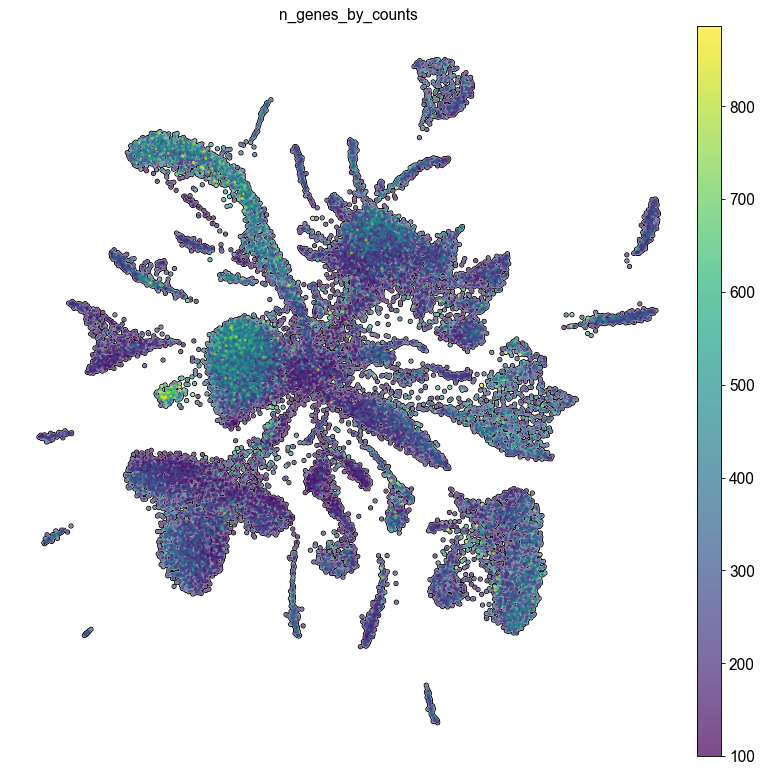

In [39]:
with rc_context({'figure.figsize': (12, 12)}):
    sc.pl.umap(adata, color='n_genes_by_counts', legend_loc='on data', legend_fontoutline = 5, title= 'n_genes_by_counts', size = 30,
        frameon=False, add_outline = True)

# Selecting the cluster of study

C:\Users\p0084975\Anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
C:\Users\p0084975\Anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
C:\Users\p0084975\Anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


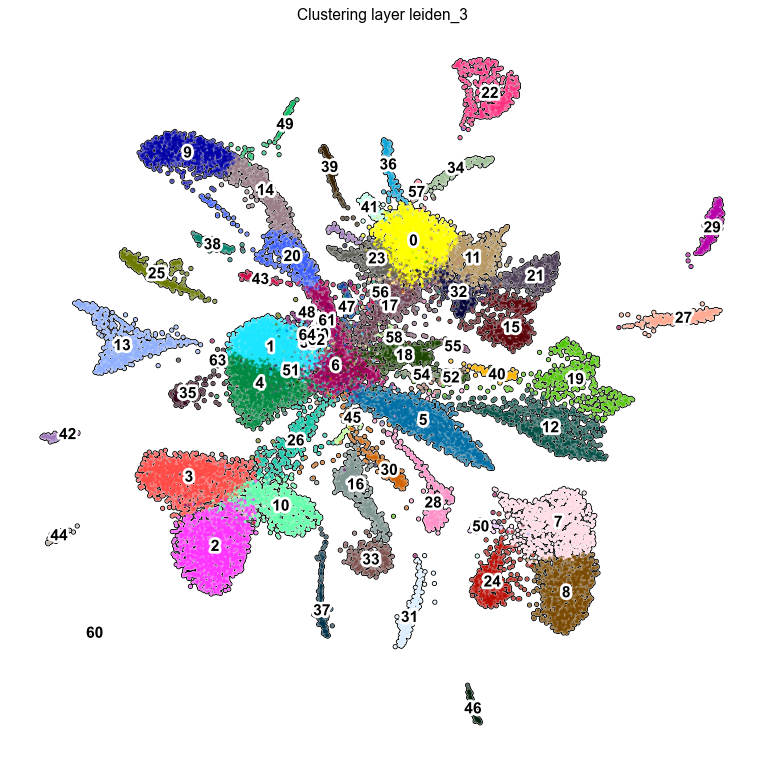

In [40]:
with rc_context({'figure.figsize': (12, 12)}):
    sc.pl.umap(adata, color=clusteringlayer, legend_loc='on data', legend_fontoutline = 5, title= 'Clustering layer '+str(clusteringlayer), size = 30,
        frameon=False, add_outline = True)

In [109]:
cl = '2'

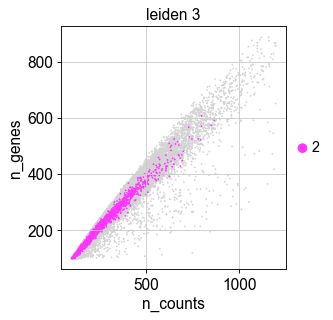

In [110]:
sc.pl.scatter(adata, x = 'n_counts', y = 'n_genes', color = clusteringlayer, groups = cl, size = 10)

# Examining the top N markers of a cluster

In [111]:
top = 20

C:\Users\p0084975\Anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


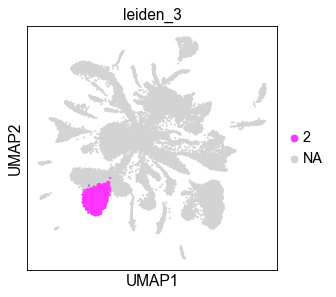

In [112]:
sc.pl.umap(adata, color = clusteringlayer, groups = cl, size = 15)

In [113]:
adata.raw.var.columns

Index(['gene_ids', 'feature_types', 'longest_isoform', 'gene_type',
       'gene_JakkeGuo', 'gene_Jakke_ver1', 'gene_ddv6', 'jakkeguo_collapsed',
       'jakke_ver1_collapsed', 'ddv6_collapsed', 'Preferred_name',
       'Description', 'PFAMs', 'mt', 'n_cells_by_counts', 'mean_counts',
       'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means',
       'dispersions', 'dispersions_norm'],
      dtype='object')

In [114]:
adata.raw.var.loc[markers_w[cl].to_list()][['gene_type','gene_ddv6', 'gene_JakkeGuo', 'gene_Jakke_ver1', 'Preferred_name','Description']]

gene_type             gene_ddv6     gene_JakkeGuo  \
h1SMcG0014354     hconf   dd_Smed_v6_2438_0_2  SMEST005752001.1   
h1SMcG0022555     hconf    dd_Smed_v6_402_0_1  SMEST016282002.1   
h1SMcG0015236     hconf   dd_Smed_v6_1161_0_1  SMEST021248001.1   
h1SMcG0016741     hconf    dd_Smed_v6_701_0_1  SMEST077782001.1   
h1SMcG0001082     hconf    dd_Smed_v6_702_0_1  SMEST031448001.1   
h1SMcG0018373     hconf    dd_Smed_v6_832_0_1    SmMSTRG.9230.1   
h1SMcG0000998     hconf    dd_Smed_v6_432_0_1  SMEST056451005.1   
h1SMcG0018100     hconf   dd_Smed_v6_1070_0_1  SMEST038928001.1   
h1SMcG0014134     hconf    dd_Smed_v6_740_0_1  SMEST024244001.1   
h1SMcG0006857     hconf   dd_Smed_v6_6915_0_1  SMEST055070136.1   
h1SMcG0006787     hconf   dd_Smed_v6_2265_0_1   SmMSTRG.16581.3   
h1SMcG0007433     hconf   dd_Smed_v6_1579_0_1  SMEST071508003.1   
h1SMcG0009472     hconf   dd_Smed_v6_2544_0_1  SMEST051697001.1   
h1SMcG0019141     hconf    dd_Smed_v6_649_0_1     SmMSTRG.154.1   
h1SMcG0020690     hconf   dd_Smed_v6_1745_0_1  SMEST017288002.1   
h1SMcG0002221     hconf    dd_Smed_v6_840_0_1  SMEST045473001.1   
h1SMcG0019140     hconf                     -  SMEST026651002.1   
h1SMcG0017034     hconf   dd_Smed_v6_4737_0_3   SmMSTRG.19803.3   
h1SMcG0020022     hconf   dd_Smed_v6_5321_0_1  SMEST035186002.1   
h1SMcG0017092     hconf   dd_Smed_v6_2500_0_1   SmMSTRG.19669.2   
h1SMcG0003233     hconf   dd_Smed_v6_4789_0_1  SMEST027800001.1   
h1SMnG0014475     hconf                     -                 -   
h1SMcG0016673     hconf   dd_Smed_v6_9565_0_1   SmMSTRG.21729.3   
h1SMcG0012064     hconf   dd_Smed_v6_2197_0_1  SMEST021729001.1   
h1SMcG0004607     hconf                     -                 -   
h1SMcG0022236     hconf   dd_Smed_v6_7371_0_1    SmMSTRG.7502.1   
h1SMcG0004606     hconf                     -   SmMSTRG.19633.9   
h1SMcG0003258     hconf   dd_Smed_v6_2922_0_1  SMEST018133001.1   
h1SMcG0005893     hconf   dd_Smed_v6_5582_0_1    SmMSTRG.1222.2   
h1SMcG0020983     hconf   dd_Smed_v6_2337_0_1    SmMSTRG.5154.2   
h1SMcG0002622     hconf    dd_Smed_v6_579_0_1  SMEST013389001.1   
h1SMcG0013462     hconf   dd_Smed_v6_1432_0_1  SmMSTRG.15939.49   
h1SMcG0010597     hconf   dd_Smed_v6_7811_0_1  SMEST002557003.1   
h1SMcG0017536     hconf                     -   SmMSTRG.17332.1   
h1SMcG0005277     hconf   dd_Smed_v6_1772_0_1   SmMSTRG.15537.5   
h1SMcG0013798     hconf    dd_Smed_v6_711_0_1  SMEST058328001.1   
h1SMcG0013445     hconf    dd_Smed_v6_810_0_1    SmMSTRG.4235.2   
h1SMnG0024083     other                     -   SmMSTRG.22097.2   
h1SMcG0020942     hconf   dd_Smed_v6_2373_0_1  SMEST016835002.1   
h1SMcG0011793     hconf  dd_Smed_v6_13610_0_1  SMEST071150002.1   
h1SMcG0003207     hconf   dd_Smed_v6_8199_0_1   SmMSTRG.11474.1   
h1SMcG0015433     hconf     dd_Smed_v6_78_0_1   SmMSTRG.15945.3   
h1SMcG0021452     hconf   dd_Smed_v6_5325_0_1   SmMSTRG.7187.14   
h1SMcG0021771     hconf  dd_Smed_v6_10142_0_1   SmMSTRG.22848.7   
h1SMnG0033069     hconf                     -                 -   
h1SMcG0019853     hconf   dd_Smed_v6_6999_0_1  SMEST072430003.1   
h1SMcG0019646     hconf   dd_Smed_v6_1721_0_1  SMEST014734005.1   
h1SMnG0020735     other                     -                 -   
h1SMcG0007395     hconf    dd_Smed_v6_333_0_1   SmMSTRG.20143.2   
h1SMcG0013191     hconf  dd_Smed_v6_13562_0_1  SMEST013633002.1   

              gene_Jakke_ver1 Preferred_name  \
h1SMcG0014354      MSTRG.1692              -   
h1SMcG0022555      MSTRG.5828              -   
h1SMcG0015236      MSTRG.6772              -   
h1SMcG0016741     MSTRG.21643              -   
h1SMcG0001082     MSTRG.10310              -   
h1SMcG0018373      MSTRG.9230              -   
h1SMcG0000998     MSTRG.17020         unc-54   
h1SMcG0018100     MSTRG.12183              -   
h1SMcG0014134      MSTRG.8544              -   
h1SMcG0006857     MSTRG.16669          HSPG2   
h1SMcG0006787     MSTRG.16581        HSP90B1   
h1SMcG0007433     MS

In [115]:
markers_w[cl]

0     h1SMcG0014354
1     h1SMcG0022555
2     h1SMcG0015236
3     h1SMcG0016741
4     h1SMcG0001082
5     h1SMcG0018373
6     h1SMcG0000998
7     h1SMcG0018100
8     h1SMcG0014134
9     h1SMcG0006857
10    h1SMcG0006787
11    h1SMcG0007433
12    h1SMcG0009472
13    h1SMcG0019141
14    h1SMcG0020690
15    h1SMcG0002221
16    h1SMcG0019140
17    h1SMcG0017034
18    h1SMcG0020022
19    h1SMcG0017092
20    h1SMcG0003233
21    h1SMnG0014475
22    h1SMcG0016673
23    h1SMcG0012064
24    h1SMcG0004607
25    h1SMcG0022236
26    h1SMcG0004606
27    h1SMcG0003258
28    h1SMcG0005893
29    h1SMcG0020983
30    h1SMcG0002622
31    h1SMcG0013462
32    h1SMcG0010597
33    h1SMcG0017536
34    h1SMcG0005277
35    h1SMcG0013798
36    h1SMcG0013445
37    h1SMnG0024083
38    h1SMcG0020942
39    h1SMcG0011793
40    h1SMcG0003207
41    h1SMcG0015433
42    h1SMcG0021452
43    h1SMcG0021771
44    h1SMnG0033069
45    h1SMcG0019853
46    h1SMcG0019646
47    h1SMnG0020735
48    h1SMcG0007395
49    h1SMcG0013191


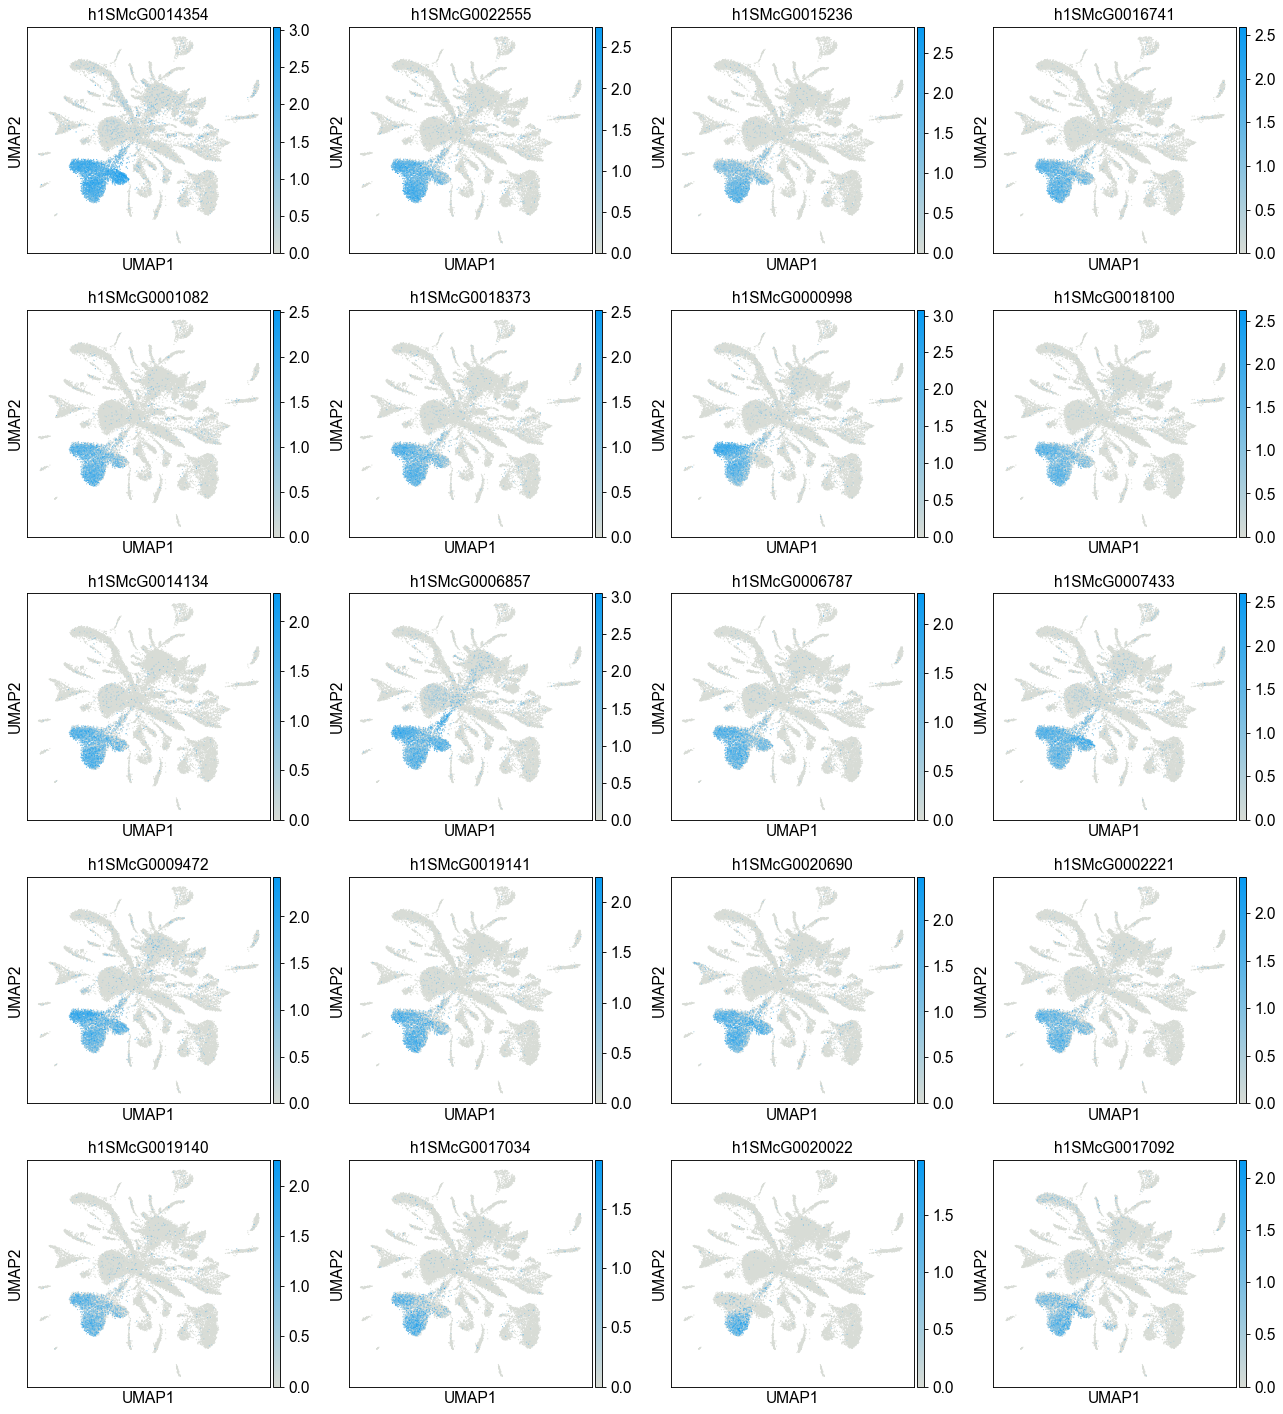

In [116]:
clmarkers = markers_w[cl].loc[0:(top-1)].to_list()
sc.pl.umap(adata, color=clmarkers, cmap = umap_cmap)

C:\Users\p0084975\Anaconda3\lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


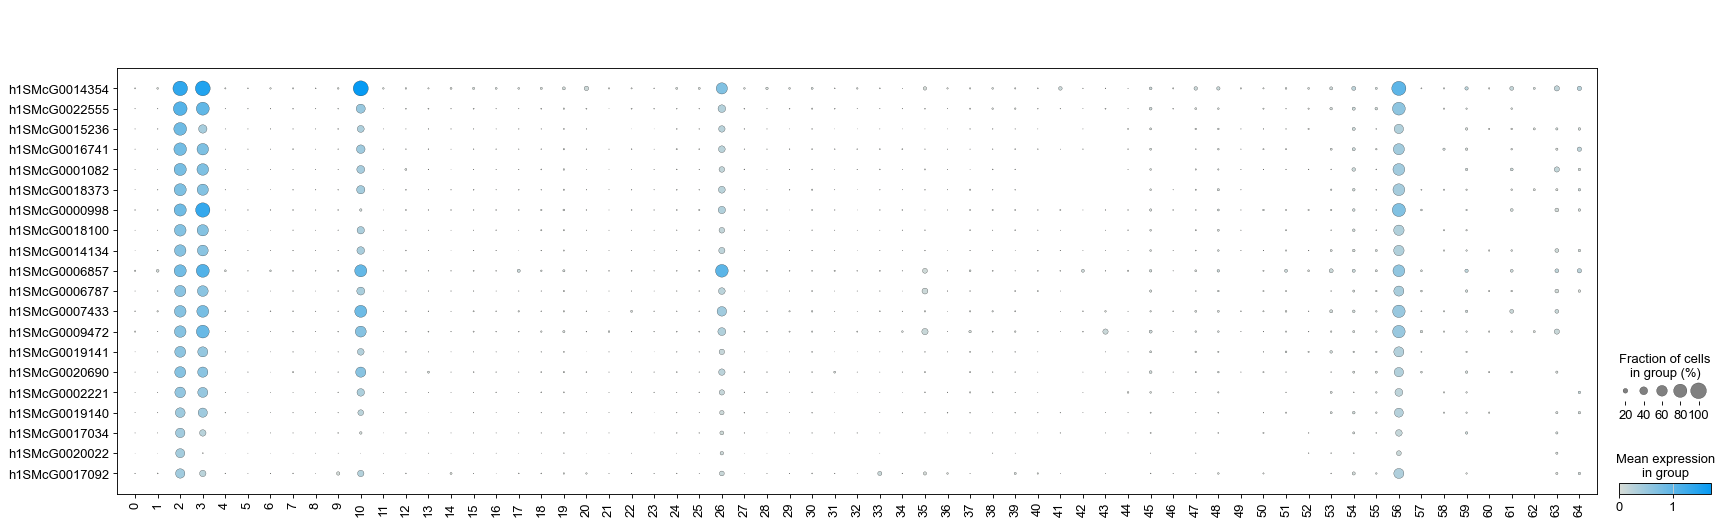

In [117]:
sc.pl.dotplot(adata, clmarkers, groupby= clusteringlayer, swap_axes = True, cmap = umap_cmap)

In [118]:
markers_l[cl]

0     h1SMcG0020022
1     h1SMcG0016673
2     h1SMcG0015236
3     h1SMcG0000998
4     h1SMcG0017034
5     h1SMcG0014354
6     h1SMcG0003207
7     h1SMcG0010878
8     h1SMcG0022555
9     h1SMcG0017092
10    h1SMcG0009854
11    h1SMcG0017805
12    h1SMcG0018373
13    h1SMcG0009859
14    h1SMcG0006734
15    h1SMcG0016741
16    h1SMcG0006787
17    h1SMcG0004725
18    h1SMcG0016202
19    h1SMcG0010597
20    h1SMcG0019141
21    h1SMcG0002309
22    h1SMcG0017506
23    h1SMcG0000708
24    h1SMcG0015598
25    h1SMcG0012580
26    h1SMcG0006857
27    h1SMcG0006295
28    h1SMcG0005423
29    h1SMcG0001082
30    h1SMcG0017808
31    h1SMcG0021709
32    h1SMcG0001030
33    h1SMcG0014481
34    h1SMcG0001797
35    h1SMcG0018100
36    h1SMcG0007433
37    h1SMcG0000017
38    h1SMcG0000872
39    h1SMcG0001433
40    h1SMcG0022548
41    h1SMcG0007937
42    h1SMcG0002517
43    h1SMcG0015433
44    h1SMcG0002221
45    h1SMcG0005277
46    h1SMcG0022543
47    h1SMcG0004401
48    h1SMcG0014134
49    h1SMcG0013191


In [119]:
adata.raw.var.loc[markers_l[cl].to_list()][['gene_type','gene_ddv6', 'gene_JakkeGuo', 'gene_Jakke_ver1', 'Preferred_name','Description']]

gene_type             gene_ddv6     gene_JakkeGuo  \
h1SMcG0020022     hconf   dd_Smed_v6_5321_0_1  SMEST035186002.1   
h1SMcG0016673     hconf   dd_Smed_v6_9565_0_1   SmMSTRG.21729.3   
h1SMcG0015236     hconf   dd_Smed_v6_1161_0_1  SMEST021248001.1   
h1SMcG0000998     hconf    dd_Smed_v6_432_0_1  SMEST056451005.1   
h1SMcG0017034     hconf   dd_Smed_v6_4737_0_3   SmMSTRG.19803.3   
h1SMcG0014354     hconf   dd_Smed_v6_2438_0_2  SMEST005752001.1   
h1SMcG0003207     hconf   dd_Smed_v6_8199_0_1   SmMSTRG.11474.1   
h1SMcG0010878     hconf  dd_Smed_v6_14651_0_1   SmMSTRG.18226.1   
h1SMcG0022555     hconf    dd_Smed_v6_402_0_1  SMEST016282002.1   
h1SMcG0017092     hconf   dd_Smed_v6_2500_0_1   SmMSTRG.19669.2   
h1SMcG0009854     hconf   dd_Smed_v6_6976_0_1  SMEST051078002.1   
h1SMcG0017805     hconf  dd_Smed_v6_13045_0_1  SMEST063654003.1   
h1SMcG0018373     hconf    dd_Smed_v6_832_0_1    SmMSTRG.9230.1   
h1SMcG0009859     hconf  dd_Smed_v6_13435_0_1   SmMSTRG.13403.1   
h1SMcG0006734     hconf  dd_Smed_v6_11876_0_1  SMEST027402002.1   
h1SMcG0016741     hconf    dd_Smed_v6_701_0_1  SMEST077782001.1   
h1SMcG0006787     hconf   dd_Smed_v6_2265_0_1   SmMSTRG.16581.3   
h1SMcG0004725     hconf  dd_Smed_v6_15458_0_1  SMEST031517001.1   
h1SMcG0016202     hconf   dd_Smed_v6_6746_0_1  SMEST069895001.1   
h1SMcG0010597     hconf   dd_Smed_v6_7811_0_1  SMEST002557003.1   
h1SMcG0019141     hconf    dd_Smed_v6_649_0_1     SmMSTRG.154.1   
h1SMcG0002309     hconf  dd_Smed_v6_10522_0_1   SmMSTRG.11741.1   
h1SMcG0017506     hconf   dd_Smed_v6_8804_0_1   SmMSTRG.17306.1   
h1SMcG0000708     hconf  dd_Smed_v6_12679_0_1    SmMSTRG.9504.1   
h1SMcG0015598     hconf   dd_Smed_v6_6736_0_1    SmMSTRG.8953.7   
h1SMcG0012580     hconf  dd_Smed_v6_10585_0_1  SMEST073898001.1   
h1SMcG0006857     hconf   dd_Smed_v6_6915_0_1  SMEST055070136.1   
h1SMcG0006295     hconf  dd_Smed_v6_14150_0_1    SmMSTRG.1336.1   
h1SMcG0005423     hconf   dd_Smed_v6_7356_0_1  SMEST017885001.1   
h1SMcG0001082     hconf    dd_Smed_v6_702_0_1  SMEST031448001.1   
h1SMcG0017808     hconf  dd_Smed_v6_10764_0_1  SMEST063648003.1   
h1SMcG0021709     hconf   dd_Smed_v6_3516_1_1  SMEST081921005.1   
h1SMcG0001030     hconf   dd_Smed_v6_2451_0_4  SmMSTRG.17069.11   
h1SMcG0014481     hconf                     -  SMEST008712003.1   
h1SMcG0001797     hconf   dd_Smed_v6_4439_0_1  SMEST023584001.1   
h1SMcG0018100     hconf   dd_Smed_v6_1070_0_1  SMEST038928001.1   
h1SMcG0007433     hconf   dd_Smed_v6_1579_0_1  SMEST071508003.1   
h1SMcG0000017     hconf   dd_Smed_v6_9677_0_1  SMEST029673001.1   
h1SMcG0000872     hconf   dd_Smed_v6_4399_0_1    SmMSTRG.3368.1   
h1SMcG0001433     hconf  dd_Smed_v6_11753_0_1  SMEST032390001.1   
h1SMcG0022548     hconf   dd_Smed_v6_3391_0_3    SmMSTRG.5820.1   
h1SMcG0007937     hconf   dd_Smed_v6_9795_0_1  SMEST006806001.1   
h1SMcG0002517     hconf  dd_Smed_v6_13817_0_1   SmMSTRG.13994.1   
h1SMcG0015433     hconf     dd_Smed_v6_78_0_1   SmMSTRG.15945.3   
h1SMcG0002221     hconf    dd_Smed_v6_840_0_1  SMEST045473001.1   
h1SMcG0005277     hconf   dd_Smed_v6_1772_0_1   SmMSTRG.15537.5   
h1SMcG0022543     hconf   dd_Smed_v6_5187_0_1  SMEST016262002.1   
h1SMcG0004401     hconf    dd_Smed_v6_508_0_1  SMEST054547001.1   
h1SMcG0014134     hconf    dd_Smed_v6_740_0_1  SMEST024244001.1   
h1SMcG0013191     hconf  dd_Smed_v6_13562_0_1  SMEST013633002.1   

              gene_Jakke_ver1 Preferred_name  \
h1SMcG0020022     MSTRG.11053              -   
h1SMcG0016673     MSTRG.21729              -   
h1SMcG0015236      MSTRG.6772              -   
h1SMcG0000998     MSTRG.17020         unc-54   
h1SMcG0017034     MSTRG.19803        CLEC18A   
h1SMcG0014354      MSTRG.1692              -   
h1SMcG0003207     MSTRG.11474          PTPRD   
h1SMcG0010878     MSTRG.18226          OR1L8   
h1SMcG0022555      MSTRG.5828              -   
h1SMcG0017092     MSTRG.19669              -   
h1SMcG0009854     MSTRG.13397          PDE2A   
h1SMcG0017805     MS

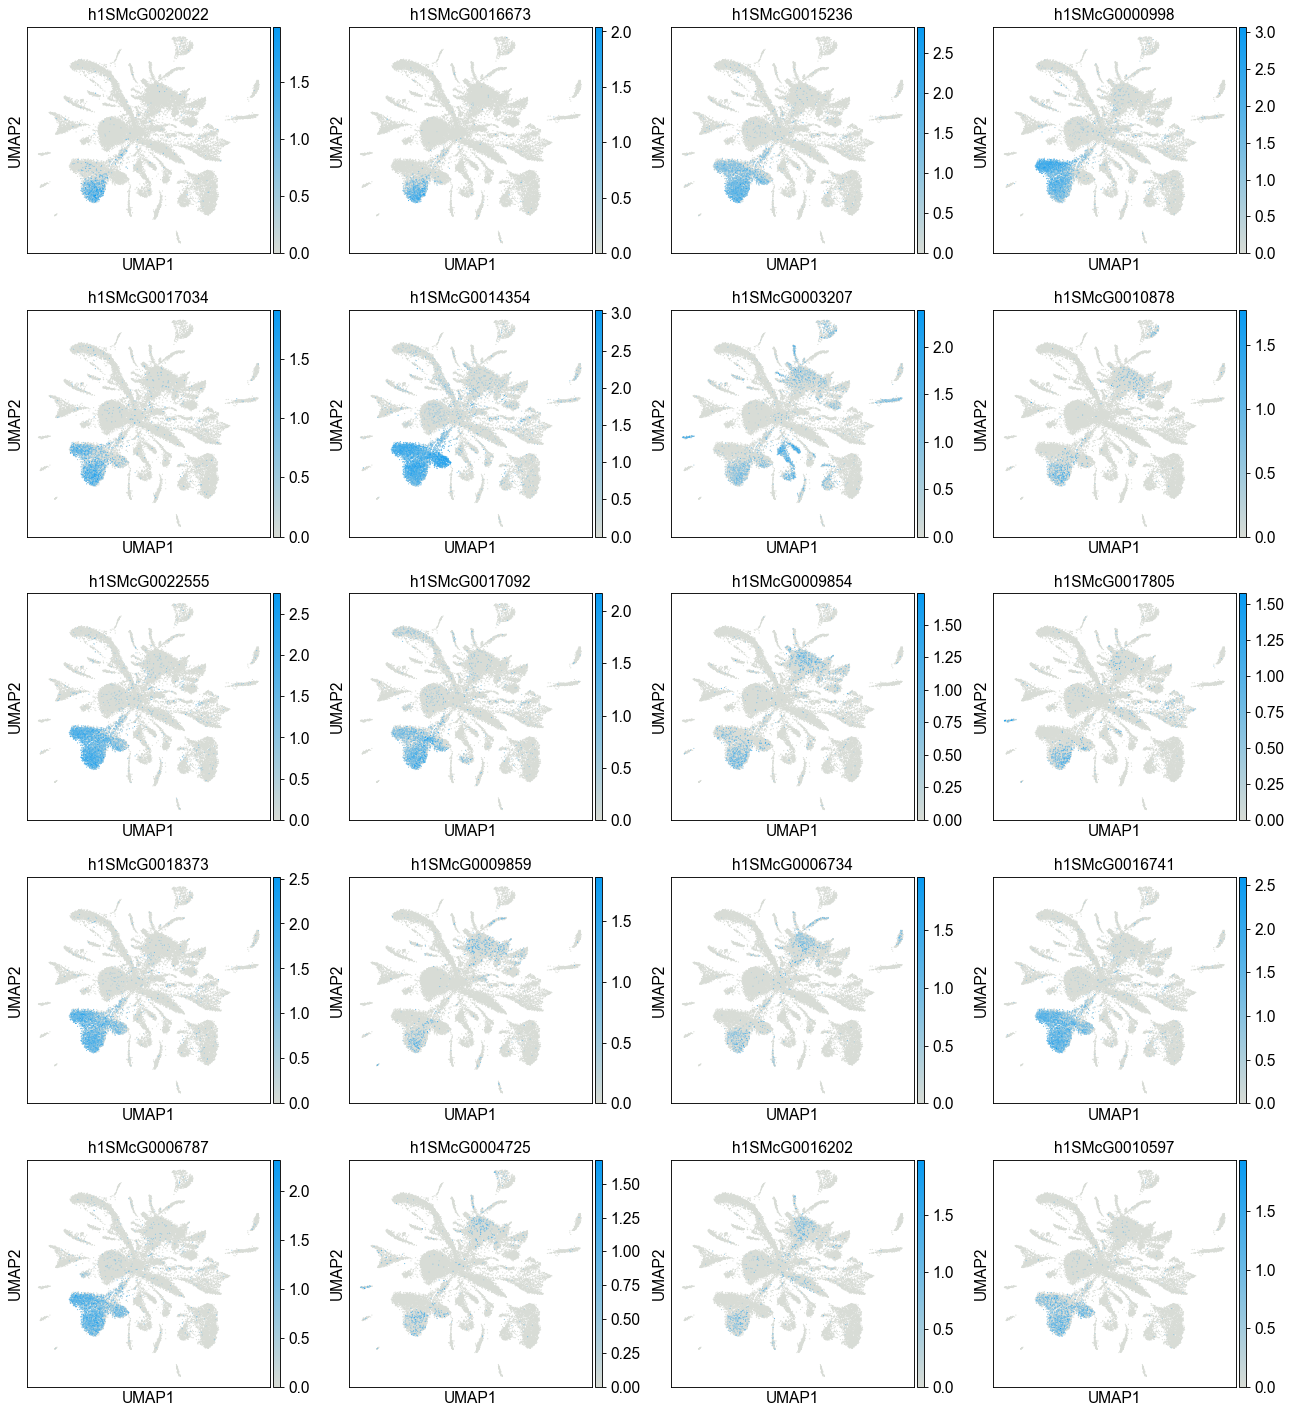

In [120]:
clmarkersl = markers_l[cl].loc[0:(top-1)].to_list()
sc.pl.umap(adata, color=clmarkersl, cmap = umap_cmap)

C:\Users\p0084975\Anaconda3\lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


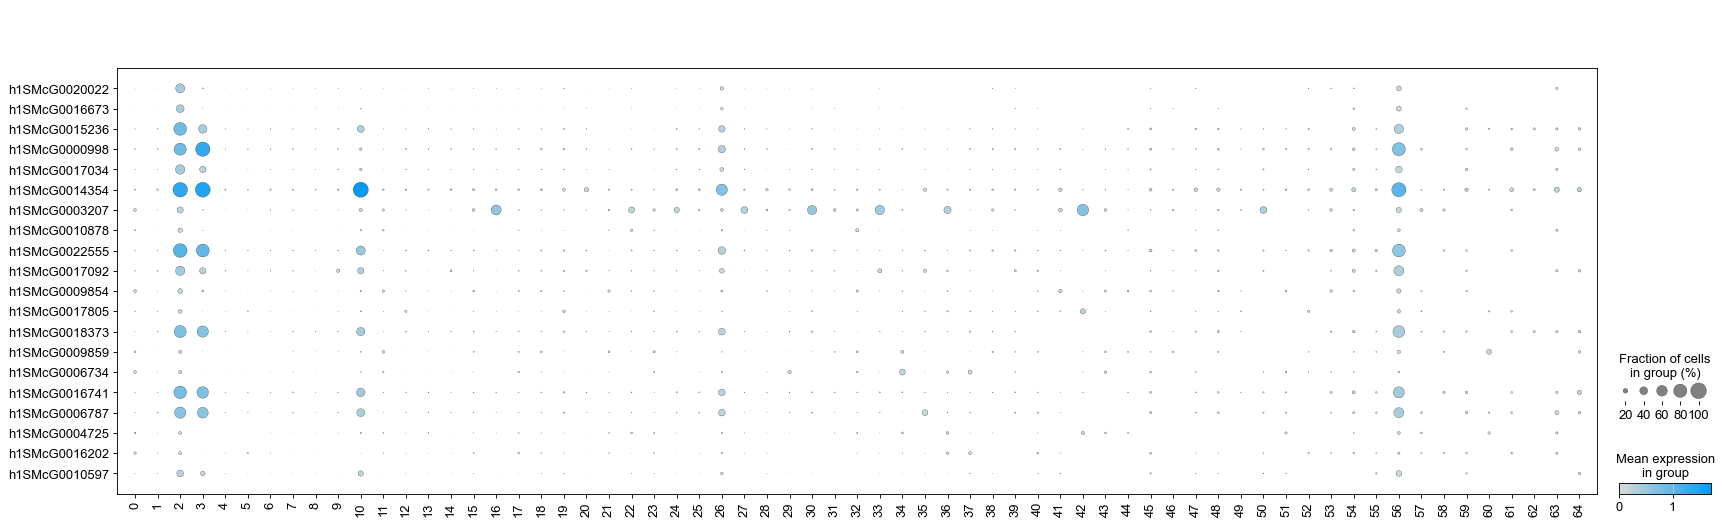

In [121]:
sc.pl.dotplot(adata, clmarkersl, groupby= clusteringlayer, swap_axes = True, cmap = umap_cmap)

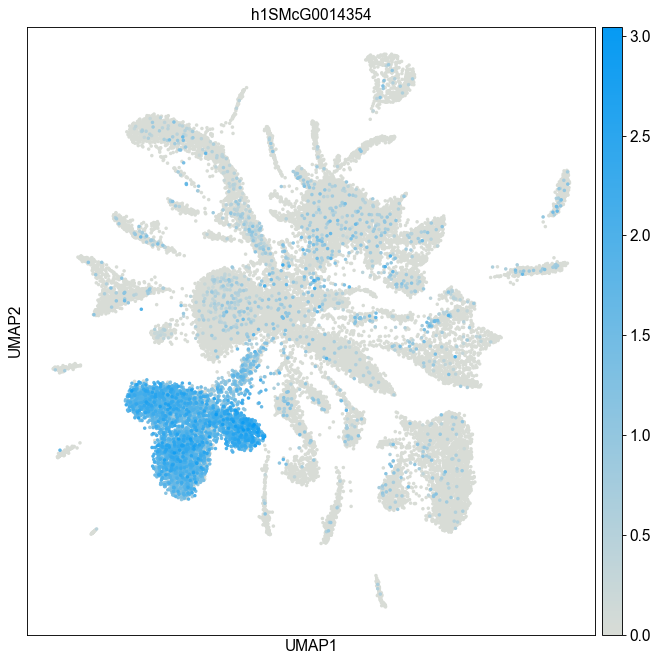

In [122]:
mark = 0
# 
#
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(adata, color=markers_w[cl][mark], size = 40, cmap = umap_cmap)


In [123]:
adata_sliced = adata[adata.obs[clusteringlayer].isin([cl])]

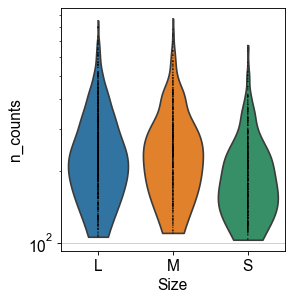

In [124]:
sc.pl.violin(adata_sliced, keys = 'n_counts' , groupby = 'Size', log = True, jitter = False, multi_panel = False)

In [125]:
groups = adata_sliced.obs.groupby('Size')
L = int(groups.get_group('L')['n_counts'].mean())
M = int(groups.get_group('M')['n_counts'].mean())
S = int(groups.get_group('S')['n_counts'].mean())
print (L, M, S)

282 284 218
